# Problem 1: time variations

In [6]:
import re

def extract_single_task_times_from_file(file_path):
    times = []
    with open(file_path, 'r') as file:
        for line in file:
            # Use regular expression to find lines with times
            match = re.search(r'Single task: Run no\.  \d+: (\d+) occurrences found in (\d+,\d+) s', line)
            if match:
                time_str = match.group(2)  # Extract the time string
                # Replace ',' with '.' and convert to float
                time_float = float(time_str.replace(',', '.'))
                times.append(time_float)
    return times

def extract_multi_task_times_from_file(file_path):
    times = []
    with open(file_path, 'r') as file:
        for line in file:
            # Use regular expression to find lines with times
            match = re.search(r'Using  \d tasks: Run no\.  \d+: (\d+) occurrences found in (\d+,\d+) s', line)
            if match:
                time_str = match.group(2)  # Extract the time string
                # Replace ',' with '.' and convert to float
                time_float = float(time_str.replace(',', '.'))
                times.append(time_float)
    return times

def extract_average_speed_from_file(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            # Use regular expression to find lines with times
            match = re.search(r'Average speedup: (\d+[,\.]\d+)', line)
            if match:
                match_str = match.group(1)  # Extract the time string
                # Replace ',' with '.' and convert to float
                avg_speedup = float(match_str.replace(',', '.'))
                return avg_speedup

# Example usage:
# file_path = 'results/problem1-2-genome.txt'  # Replace with your file path
# time_array = extract_times_from_file(file_path)
# print(time_array)

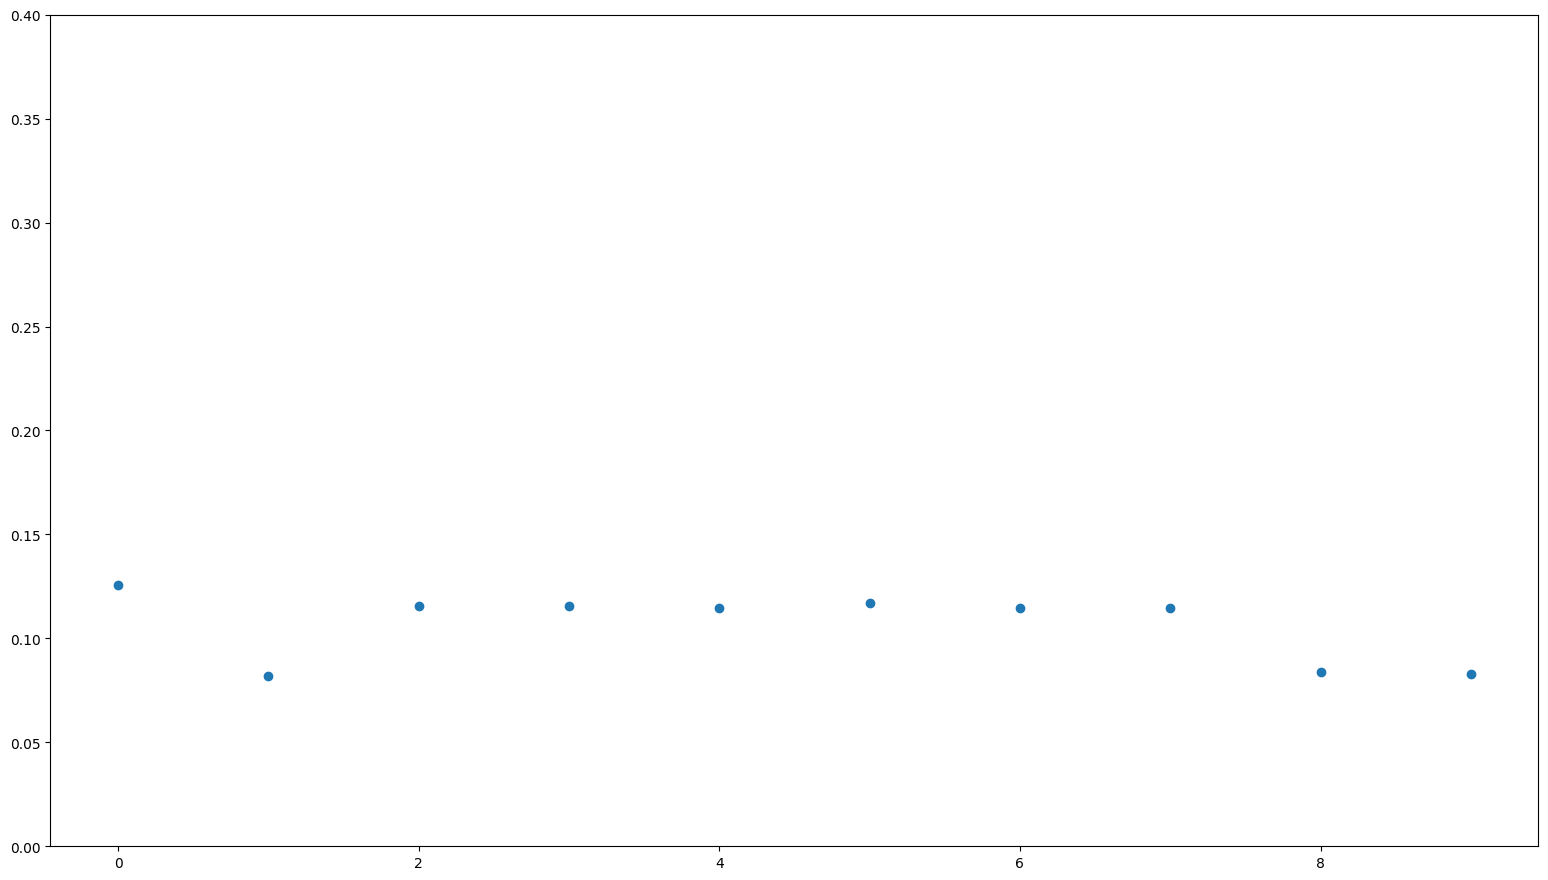

In [7]:
import matplotlib.pyplot as plt

genome_y = extract_single_task_times_from_file('results/problem1/problem1-2-genome.txt')
x = range(len(genome_y))

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 0.4)
ax.scatter(x, genome_y)

We see that the two first execution times are much more unstable. We will therefore use the warmup argument -W with a value of 2 from now on.

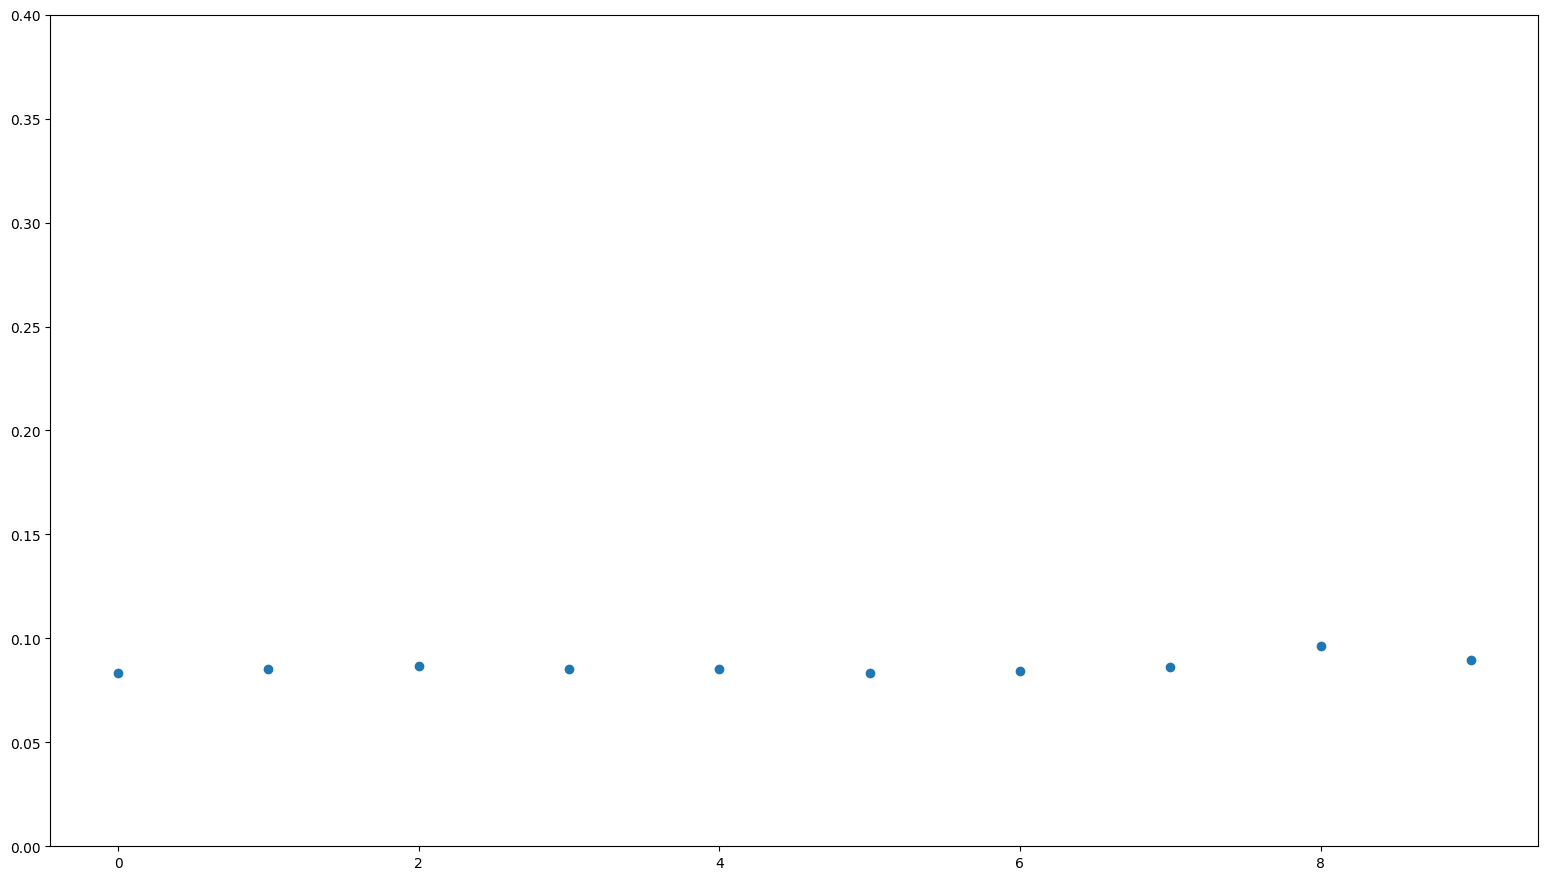

In [8]:
genome_y = extract_single_task_times_from_file('results/problem1/problem1-3-genome.txt')
x = range(len(genome_y))

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 0.4)
ax.scatter(x, genome_y)

Now with a warmup of 2 we can get a much more stable line.

# Problem 2

After changing the code to allow for multiple tasks we can run this same again, with different amount of tasks and see which ones faster

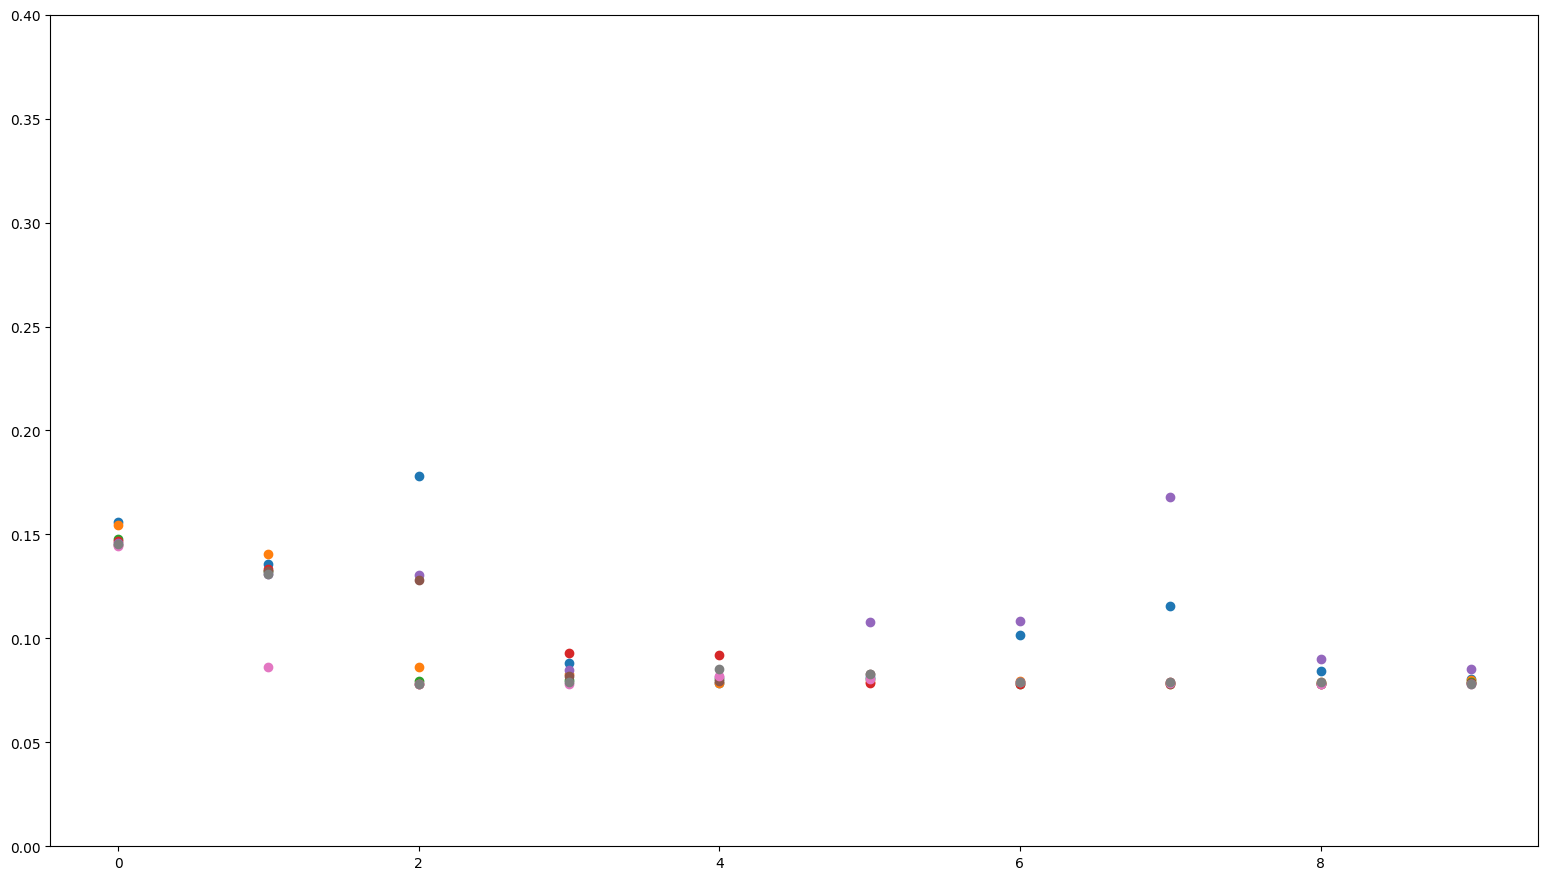

In [9]:
y1 = extract_single_task_times_from_file('results/problem2/human_genome/tasks=2.txt')
y2 = extract_single_task_times_from_file('results/problem2/human_genome/tasks=3.txt')
y3 = extract_single_task_times_from_file('results/problem2/human_genome/tasks=4.txt')
y4 = extract_single_task_times_from_file('results/problem2/human_genome/tasks=5.txt')
y5 = extract_single_task_times_from_file('results/problem2/human_genome/tasks=6.txt')
y6 = extract_single_task_times_from_file('results/problem2/human_genome/tasks=7.txt')
y7 = extract_single_task_times_from_file('results/problem2/human_genome/tasks=8.txt')
y8 = extract_single_task_times_from_file('results/problem2/human_genome/tasks=9.txt')
x = range(len(y1))

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 0.4)
ax.scatter(x, y1)
ax.scatter(x, y2)
ax.scatter(x, y3)
ax.scatter(x, y4)
ax.scatter(x, y5)
ax.scatter(x, y6)
ax.scatter(x, y7)
ax.scatter(x, y8)


As these are all over the place we can use the average speedup and plot that against the amount of tasks

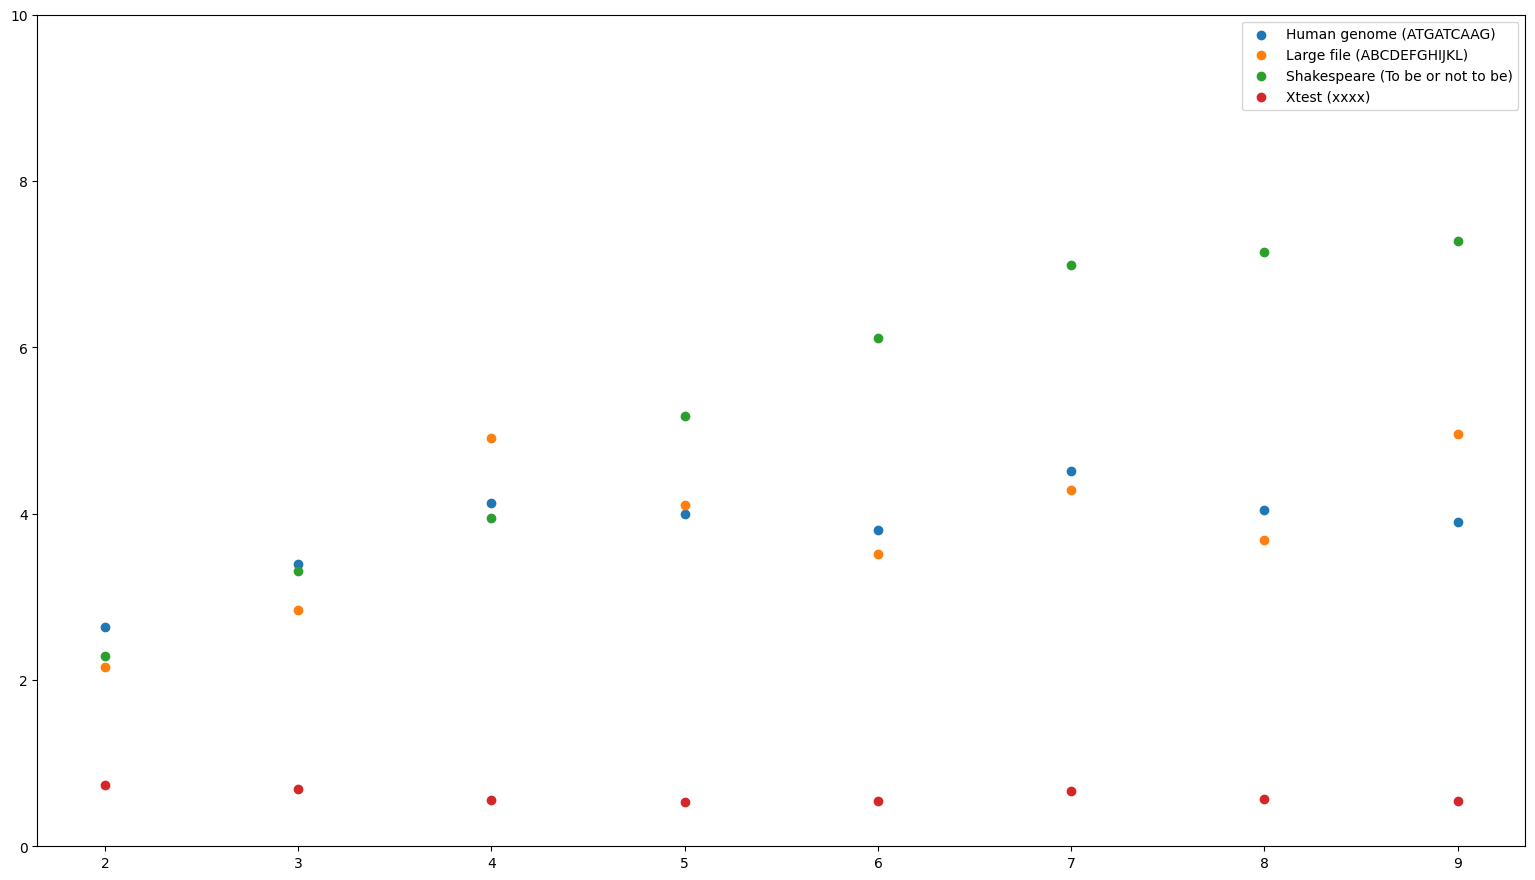

In [10]:
# plot average speedup vs number of tasks

genome_y = []
large_file_y = []
xtest_y = []
shakespeare_y = []
for i in range(2, 10):
    genome_y.append(
        extract_average_speed_from_file(f"results/problem2/human_genome/tasks={i}.txt")
    )
    large_file_y.append(
        extract_average_speed_from_file(f"results/problem2/large_file/tasks={i}.txt")
    )
    xtest_y.append(
        extract_average_speed_from_file(f"results/problem2/xtest/tasks={i}.txt")
    )
    shakespeare_y.append(
        extract_average_speed_from_file(f"results/problem2/shakespeare/tasks={i}.txt")
    )


x = range(2, 10)

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 10)
ax.scatter(x, genome_y)
ax.scatter(x, large_file_y)
ax.scatter(x, shakespeare_y)
ax.scatter(x, xtest_y)
ax.legend(
    [
        "Human genome (ATGATCAAG)",
        "Large file (ABCDEFGHIJKL)",
        "Shakespeare (To be or not to be)",
        "Xtest (xxxx)",
    ]
)

Because we are not yet at the limit we will try and increase the amount of tasks that are running, to see when it goes down again. Here we increased the range from (2,10) to (2,80) in Problem2_TestTasks.py.

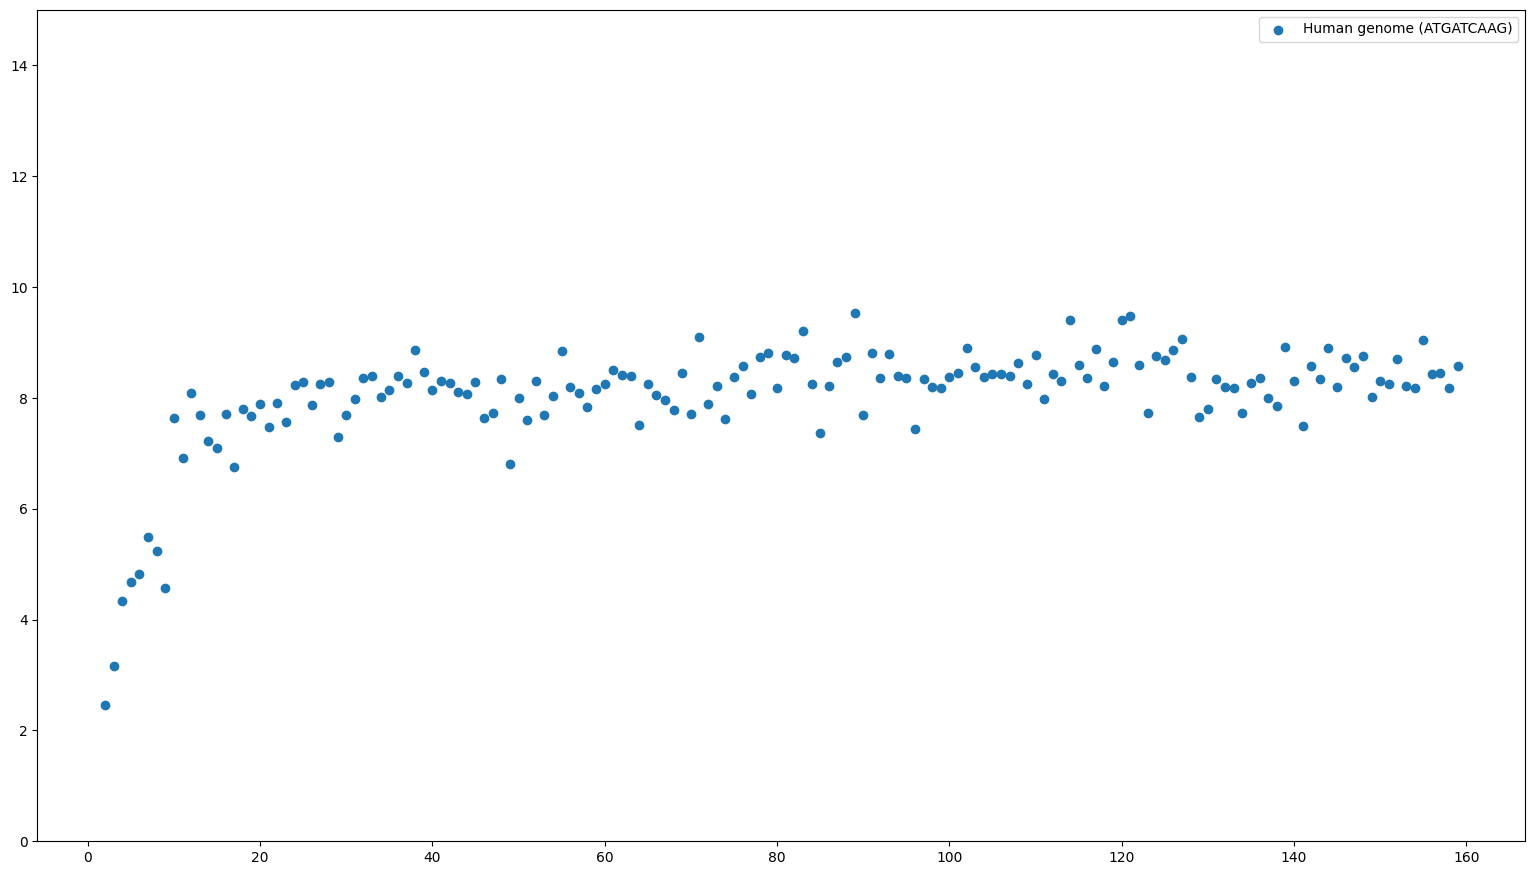

In [21]:
# plot average speedup vs number of tasks

genome_y = []
large_file_y = []
xtest_y = []
shakespeare_y = []

tests = 160

for i in range(2, tests):
    # genome_y.append(
    #     extract_average_speed_from_file(f"results/problem2/human_genome/tasks={i}.txt")
    # )
    # large_file_y.append(
    #     extract_average_speed_from_file(f"results/problem2/large_file/tasks={i}.txt")
    # )
    # xtest_y.append(
    #     extract_average_speed_from_file(f"results/problem2/xtest/tasks={i}.txt")
    # )
    shakespeare_y.append(
        extract_average_speed_from_file(f"results/problem2/shakespeare/tasks={i}.txt")
    )


x = range(2, tests)

# scatter plot of y vs x, in the resolution 16:9. y should start at 0.0
fig, ax = plt.subplots(figsize=(19.2, 10.8))
ax.set_ylim(0, 15)
# ax.scatter(x, genome_y)
# ax.scatter(x, large_file_y)
ax.scatter(x, shakespeare_y)
# ax.scatter(x, xtest_y)
ax.legend(
    [
        "Human genome (ATGATCAAG)",
        "Large file (ABCDEFGHIJKL)",
        "Shakespeare (To be or not to be)",
        "Xtest (xxxx)",
    ]
)

Even with a whopping 160 tasks, there seems to be no drop-off in performance from around 16-20 tasks. Even trying 200, 400, 600, 800 tasks there is no significant drop-off. At 4000 tasks average speedup of one run was a little bit above 5, so a slight decrease to the same as around 7-8 tasks. At 16000 tasks we are getting a mere 2,5 times speedup, which is the same as 2-3 tasks. 